In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
maquinas=("small","medium","xlarge","xxlarge")
taxassin=[]
taxassout=[]
discoss=[]
for i in range(0,len(maquinas)):
    maquina = maquinas[i]
    l_data  = pd.read_csv(maquina+"_Monitor.csv")
    #l_round  = pd.read_csv("./last_data/"+maquina+".csv")
    taxasin=[]
    taxasout=[]
    discos=[]
    if (i == 0):
      n = 8
    elif (i == 1):
      n = 14
    else:
      n = 15

    for j in range(1,n):   
        #entrada
        redein=l_data.query('round=='+str(j))
        tamanhoin = len(redein)
        totalin = redein['Net-out(bytes)'].iloc[-1]
        taxain = ((totalin/tamanhoin)/1024**2*8)
        taxasin.append( round(taxain, 2))
        #saida
        redeout=l_data.query('round=='+str(j))
        tamanhoout = len(redeout)
        totalout = redeout['Net-in(bytes)'].iloc[-1]
        taxaout = ((totalout/tamanhoout)/1024**2*8)
        taxasout.append( round(taxaout, 2))
        disco = redeout['Block-use(bytes)'].iloc[-1]
        totaldisco = disco/1024**2
        discos.append(totaldisco)
    discoss.append(discos)
    taxassin.append(taxasin)
    taxassout.append(taxasout) 

In [ ]:
print(taxassin)  
print(taxassout)
print(discoss)

[[3.45, 6.59, 11.53, 16.19, 21.09, 44.71, 41.69], [3.78, 11.11, 18.09, 26.54, 35.53, 45.57, 58.03, 69.13, 81.06, 91.4, 106.07, 116.77, 117.55], [3.84, 6.46, 18.33, 24.12, 18.44, 18.83, 20.7, 25.68, 25.96, 26.8, 20.98, 30.16, 21.01, 30.02], [4.64, 6.5, 18.52, 22.13, 25.83, 39.11, 39.62, 39.95, 38.26, 27.55, 38.64, 31.12, 32.54, 34.92]]
[[3.94, 7.53, 12.19, 16.91, 21.17, 46.52, 42.33], [4.32, 12.72, 20.28, 28.84, 37.6, 46.91, 58.49, 68.51, 81.09, 91.54, 105.96, 115.88, 116.59], [4.52, 7.89, 21.74, 28.11, 22.97, 22.83, 22.51, 28.23, 28.13, 28.8, 20.79, 29.49, 22.02, 27.99], [6.03, 7.92, 22.01, 27.68, 32.66, 45.17, 45.57, 45.85, 44.03, 34.97, 43.97, 37.37, 38.71, 39.78]]
[[223.2578125, 363.5703125, 494.78125, 615.71875, 731.21484375, 789.109375, 833.79296875], [251.73828125, 415.41015625, 625.02734375, 827.41015625, 1023.69921875, 1242.71484375, 1390.26171875, 1535.40234375, 1704.48828125, 1865.8203125, 2042.24609375, 2210.62890625, 2396.17578125], [67.6953125, 269.40234375, 577.9609375, 7

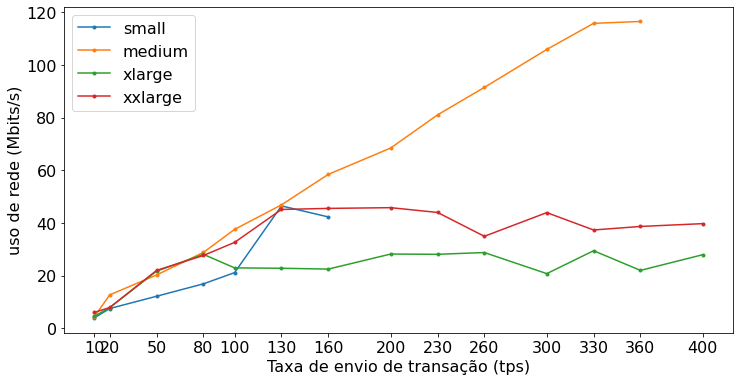

In [ ]:
# Gerar grafico saída de rede  --> redein['Net-out(bytes)']

p=[10, 20, 50, 80, 100, 130, 160, 200, 230, 260, 300, 330, 360, 400]
plt.rcParams.update({'font.size':16})
fig,ax = plt.subplots(figsize =(12,6))
#ax.set_title('Ethereum Provider - uso entrada de rede') 
ax.set_xlabel('Taxa de envio de transação (tps)')
ax.set_ylabel('uso de rede (Mbits/s)')
for i in range(0,4):
    size = len(taxassout[i])
    ax.plot(p[:size],taxassout[i], marker=".", label=maquinas[i])
plt.xticks(p)
plt.legend()
plt.savefig('grafico_redeout.pdf')
plt.show()

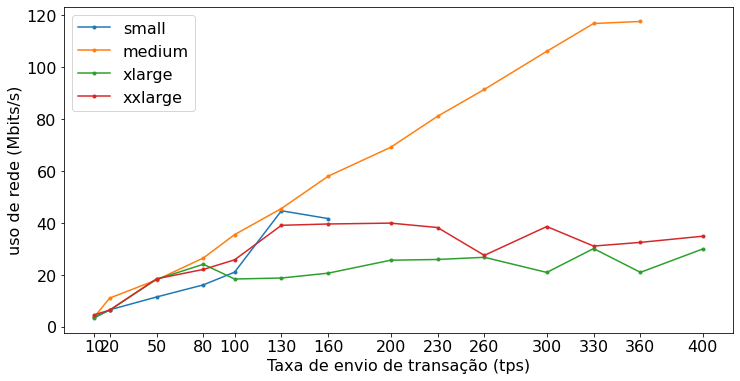

In [ ]:
# Gerar grafico saída de rede --> redeout['Net-in(bytes)']

p=[10, 20, 50, 80, 100, 130, 160, 200, 230, 260, 300, 330, 360, 400]
plt.rcParams.update({'font.size':16})
fig,ax = plt.subplots(figsize =(12,6))
#ax.set_title('Ethereum Provider - uso saida de rede')
ax.set_xlabel('Taxa de envio de transação (tps)')
ax.set_ylabel('uso de rede (Mbits/s)')
for i in range(0,4):
    size = len(taxassin[i])
    ax.plot(p[:size],taxassin[i], marker=".", label=maquinas[i])
plt.xticks(p)
plt.legend()
plt.savefig('grafico_redein.pdf')
plt.show()

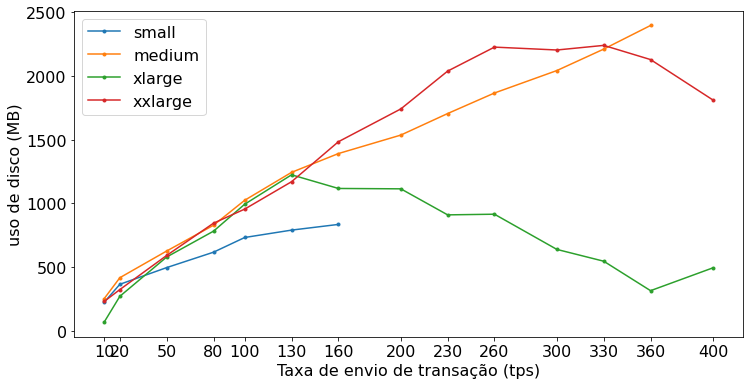

In [ ]:
# Gerar grafico uso de disco --> redeout['Block-use(bytes)']

p=[10, 20, 50, 80, 100, 130, 160, 200, 230, 260, 300, 330, 360, 400]
plt.rcParams.update({'font.size':16})
fig,ax = plt.subplots(figsize =(12,6))
#ax.set_title('Ethereum Provider - gravação em disco')
ax.set_xlabel('Taxa de envio de transação (tps)')
ax.set_ylabel('uso de disco (MB)')
for i in range(0,4):
    size = len(discoss[i])
    ax.plot(p[:size],discoss[i], marker=".", label=maquinas[i])
plt.xticks(p)
plt.legend()
plt.savefig('grafico_disco.pdf')
plt.show()

In [ ]:
l_data = pd.read_csv('medium.csv')

In [ ]:
siteB__cpu_mean = []
siteB__mem_mean = []
siteB__cpu_erro = []
siteB_filtro = []
for i in range(1,14):
    l_round_x = l_data.query('round==%s'%i)
    cpu = l_round_x['cpu(%)']
    memoria = l_round_x['memoria(%)']
    siteB_filtro.append(cpu.tolist())
    #print(cpu)
    cpu_mean = np.mean(cpu)
    mem_mean = np.mean(memoria)
    siteB__cpu_mean.append(cpu_mean)
    siteB__mem_mean.append(mem_mean)

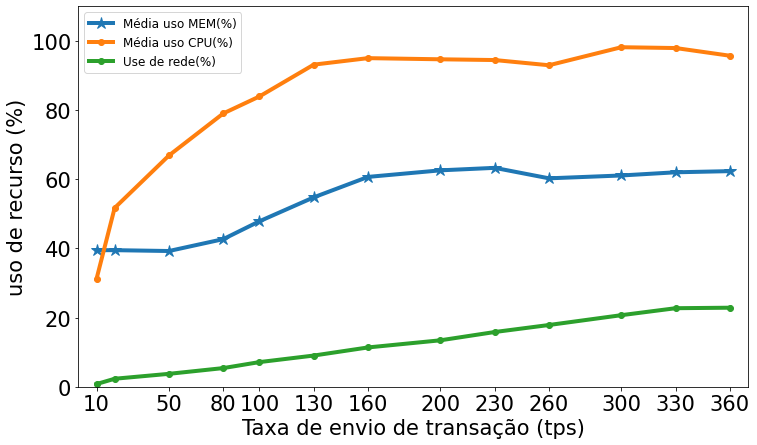

In [ ]:
#calculo de rede
p = [10, 20, 50, 80, 100, 130, 160, 200, 230, 260, 300, 330, 360]
taxaR=[]
for i in range(1,14):   
    #entrada
    redein=l_data.query('round=='+str(i))
    tamanhoin = len(redein)
    redeout=l_data.query('round=='+str(i))
    tamanhoout = len(redeout)
    totalin = redein['Net-out(bytes)'].iloc[-1]
    totalout = redeout['Net-in(bytes)'].iloc[-1]
    taxain = ((totalin/tamanhoin)/1024**2*8)
    taxaout = ((totalout/tamanhoout)/1024**2*8)
    taxaR.append((taxain+taxaout)/1024*100)  


dataFiltroMediaCPU = siteB__cpu_mean
dataFiltroMediaMEM = siteB__mem_mean
plt.rcParams.update({'font.size':21})
fig,ax = plt.subplots(figsize =(12,7))
#ax.set_title('t2.medium')
ax.set_xlabel('Taxa de envio de transação (tps)')
ax.set_ylabel('uso de recurso (%)')
ax.set_ylim(0, 110)
ax.set_xlim(0,370)

#ax.grid(linestyle='dotted')
ax.plot(p,dataFiltroMediaMEM, marker="*", linewidth=4, markersize=12, label="Média uso MEM(%)")
ax.plot(p,dataFiltroMediaCPU, marker=".", linewidth=4, markersize=12, label="Média uso CPU(%)")
ax.plot(p,taxaR, marker=".", linewidth=4, markersize=12, label='Use de rede(%)')
#plt.yticks(fontsize=18)
plt.xticks([10, 50, 80, 100, 130, 160, 200, 230, 260, 300, 330, 360])

plt.legend(fontsize=12)
plt.savefig('recursos_medium_hf.png')
plt.show()